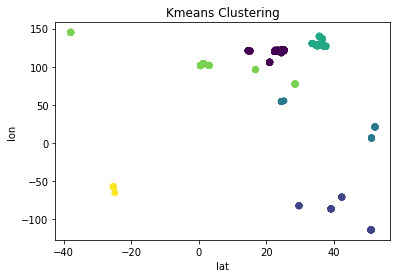

In [280]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans, DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('201703_Taiwan.csv')
df1 = df.take(np.random.permutation(len(df))[:10000])
mat = df1[[' lat',' lon']]
matrix = mat.as_matrix()
km = KMeans(n_clusters = 6)
y_pre = km.fit_predict(matrix)
km.labels_
#plt.scatter(matrix[:,0],matrix[:,1], c=[plt.cm.spectral(float(i) /4) for i in km.labels_])
plt.scatter(matrix[:, 0], matrix[:, 1], c = y_pre)
plt.title('Kmeans Clustering')
plt.xlabel('lat')
plt.ylabel('lon')
plt.show()

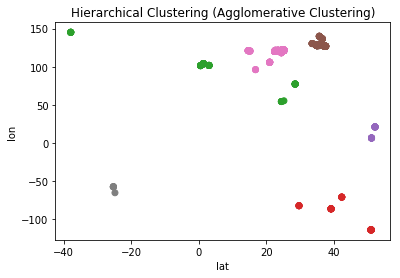

In [281]:
from sklearn.cluster import AgglomerativeClustering
def set_colors(labels, colors={-1:'C1',0:'C2',1:'C3',2:'C4',3:'C5',4:'C6',5:'C7',6:'C8',7:'C9',8:'C10'}):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

estimator2 = AgglomerativeClustering(n_clusters=6)
X = df1[[' lat',' lon']]
estimator2.fit(X)
labels = estimator2.labels_

colors = set_colors(labels)
plt.scatter(df1[' lat'], df1[' lon'], c=colors)
plt.title('Hierarchical Clustering (Agglomerative Clustering)')
plt.xlabel("lat")
plt.ylabel("lon")
plt.show()

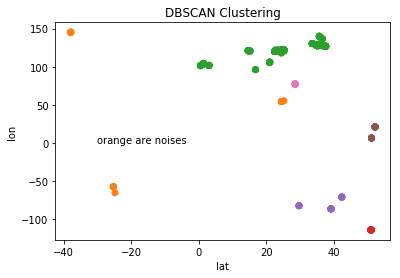

{-1, 0, 1, 2, 3, 4}

In [285]:
def set_colors(labels, colors={-1:'C1',0:'C2',1:'C3',2:'C4',3:'C5',4:'C6',5:'C7',6:'C8',7:'C9',8:'C10'}):
    colored_labels = []
    for label in labels:
        colored_labels.append(colors[label])
    return colored_labels

mat1 = df1[[' lat',' lon']]
#matrix1 = mat1.as_matrix()
estimator = DBSCAN(eps=20, min_samples=10)
estimator.fit(mat1)
labels = estimator.labels_
#colors = estimator.fit_predict(mat1)
colors = set_colors(labels)
plt.scatter(df1[' lat'], df1[' lon'], c=colors)
plt.xlabel("lat")
plt.ylabel("lon")
#c1 is orange
plt.title('DBSCAN Clustering')
plt.text(-30, .025, 'orange are noises')
plt.show()
set(labels)

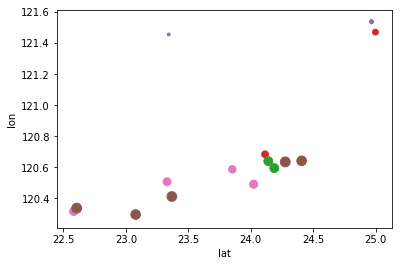

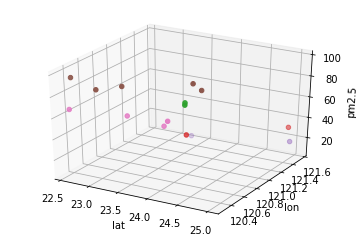

In [286]:
from mpl_toolkits.mplot3d import Axes3D
df2 = df[(df['Date']=='2017-03-10')&(df['Time']>'00:00:40')&(df['Time']<'00:00:50')]
mat2 = df2[[' lat',' lon','PM2.5']]
matrix2 = mat2.as_matrix()
km2 = KMeans(n_clusters = 5)
km2.fit_predict(matrix2)

y_pre2 = set_colors(km2.labels_)
#plt.scatter(matrix[:,0],matrix[:,1], c=[plt.cm.spectral(float(i) /4) for i in km.labels_])
plt.scatter(matrix2[:,0], matrix2[:,1],matrix2[:,2], c = y_pre2)
plt.xlabel('lat')
plt.ylabel('lon')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('pm2.5')
ax.scatter(matrix2[:,0], matrix2[:,1],matrix2[:,2], c = y_pre2)
plt.show()

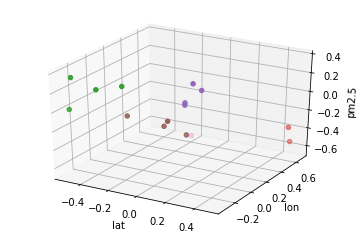

In [54]:
df3 = df[(df['Date']=='2017-03-10')&(df['Time']>'00:00:40')&(df['Time']<'00:00:50')]

mat3 = df3[[' lat',' lon','PM2.5']]
#print(mat3)
mat3_norm = (mat3 - mat3.mean()) / (mat3.max() - mat3.min())
matrix3 = mat3_norm.as_matrix()
km3 = KMeans(n_clusters = 5)
km3.fit_predict(matrix3)

y_pre3 = set_colors(km3.labels_)
#plt.scatter(matrix[:,0],matrix[:,1], c=[plt.cm.spectral(float(i) /4) for i in km.labels_])
#plt.scatter(matrix3[:,0], matrix3[:,1],matrix3[:,2], c = y_pre3,marker='o')
#plt.xlabel('lat')
#plt.ylabel('lon')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('pm2.5')
ax.scatter(matrix3[:,0], matrix3[:,1],matrix3[:,2], c = y_pre3)
plt.show()

In [177]:
adf = pd.read_csv('201703_Taiwan.csv')
adf = adf[adf['Date']=='2017-03-01']
adf = adf[(adf['PM2.5'] != 0)&(adf['PM1'] != 0)&(adf['PM10'] != 0)]
agp = adf.groupby('device_id').size().reset_index(name='counts')
agp = agp[agp['counts'] > agp['counts'].mean()/2]
adf = pd.merge(adf,agp,on='device_id')
del adf['counts']

adf['Date'] = pd.to_datetime(adf['Date'] + ' ' + adf['Time'])
del adf['Time']
#print(adf)
#index = pd.date_range('1/3/2017', periods=30, freq='T')

device_lis = adf['device_id'].drop_duplicates()
print(device_lis)

fdf = None
#print(adf)

for k in device_lis:
    new = adf[adf['device_id']==k].resample('10T',on='Date').mean()[0:144]
    new = new.fillna(new.mean())
    new['device_id'] = k
    if fdf is None:
        fdf = new
    else:
        fdf = pd.concat([fdf,new],axis=0)

        
fdf['index1'] = fdf.index
print(fdf)


table = None

for i in device_lis:
    fdf = fdf[fdf['device_id']==i]
    grouper = fdf.groupby([pd.TimeGrouper('10M'), 'index1'])
    gg = grouper['PM2.5'].mean().unstack()
    if table is None:
        table = gg
    else:
        table = pd.concat([table,gg],axis=0)

0        74DA388FF5F6
61       74DA3895E132
119      74DA3895C590
264      74DA3895C34E
311      74DA3895E12A
364      74DA3895C596
506      74DA3895E182
562      74DA3895E150
622      74DA3895C2B8
772      74DA3895DFD0
921      74DA3895C1FA
1039     74DA3895C52E
1091     74DA3895E17C
1143     74DA3895C54C
1263     74DA3895C466
1411     74DA3895C2E2
1533     74DA3895C3E0
1575     74DA3895E1A2
1632     74DA3895DF0A
1687     74DA3895C498
1740     74DA388FF60A
1786     74DA3895DE86
1835     74DA3895C388
1887     74DA3895C234
1936     74DA3895DF3E
1977     74DA3895C5AC
2029     74DA3895DEAA
2078     74DA3895DF98
2136     74DA3895C3B8
2289     74DA3895DEA8
             ...     
49008    74DA3895C25E
49069    74DA3895DF4C
49130    74DA3895C384
49196    74DA3895DF00
49235    74DA3895E180
49285    74DA3895C2CA
49335    74DA3895E192
49378    74DA3895DEB2
49428    74DA3895E09E
49466    74DA3895E148
49517    74DA3895C51E
49570    74DA3895E07A
49620    74DA3895E04E
49676    74DA3895E122
49728    7

index1,2017-03-01 08:00:00,2017-03-01 08:10:00,2017-03-01 08:20:00,2017-03-01 08:30:00,2017-03-01 08:40:00,2017-03-01 08:50:00,2017-03-01 09:00:00,2017-03-01 09:10:00,2017-03-01 09:20:00,2017-03-01 09:30:00,...,2017-03-01 22:20:00,2017-03-01 22:30:00,2017-03-01 22:40:00,2017-03-01 22:50:00,2017-03-01 23:00:00,2017-03-01 23:10:00,2017-03-01 23:20:00,2017-03-01 23:30:00,2017-03-01 23:40:00,2017-03-01 23:50:00
Date,,,,,,,,,,,,,,,,,,,,,
2017-03-31,41.0,51.387755,48.0,51.387755,47.0,57.0,51.387755,62.5,43.5,42.0,...,51.387755,49.0,51.387755,51.387755,57.0,51.387755,55.0,61.0,67.0,93.0


In [186]:
adf = pd.read_csv('201703_Taiwan.csv')
adf = adf[adf['Date']=='2017-03-01']
adf = adf[(adf['PM2.5'] != 0)&(adf['PM1'] != 0)&(adf['PM10'] != 0)]
agp = adf.groupby('device_id').size().reset_index(name='counts')
agp = agp[agp['counts'] > agp['counts'].mean()/2]
adf = pd.merge(adf,agp,on='device_id')
del adf['counts']

adf['Date'] = pd.to_datetime(adf['Date'] + ' ' + adf['Time'])
del adf['Time']
#print(adf)
#index = pd.date_range('1/3/2017', periods=30, freq='T')

device_lis = adf['device_id'].drop_duplicates()
print(device_lis)

fdf = None
#print(adf)

for k in device_lis:
    new = adf[adf['device_id']==k].resample('10T',on='Date').mean()[0:144]
    new = new.fillna(new.mean())
    new['device_id'] = k
    if fdf is None:
        fdf = new
    else:
        fdf = pd.concat([fdf,new],axis=0)

        
fdf['index1'] = fdf.index
print(fdf)



0        74DA388FF5F6
61       74DA3895E132
119      74DA3895C590
264      74DA3895C34E
311      74DA3895E12A
364      74DA3895C596
506      74DA3895E182
562      74DA3895E150
622      74DA3895C2B8
772      74DA3895DFD0
921      74DA3895C1FA
1039     74DA3895C52E
1091     74DA3895E17C
1143     74DA3895C54C
1263     74DA3895C466
1411     74DA3895C2E2
1533     74DA3895C3E0
1575     74DA3895E1A2
1632     74DA3895DF0A
1687     74DA3895C498
1740     74DA388FF60A
1786     74DA3895DE86
1835     74DA3895C388
1887     74DA3895C234
1936     74DA3895DF3E
1977     74DA3895C5AC
2029     74DA3895DEAA
2078     74DA3895DF98
2136     74DA3895C3B8
2289     74DA3895DEA8
             ...     
49008    74DA3895C25E
49069    74DA3895DF4C
49130    74DA3895C384
49196    74DA3895DF00
49235    74DA3895E180
49285    74DA3895C2CA
49335    74DA3895E192
49378    74DA3895DEB2
49428    74DA3895E09E
49466    74DA3895E148
49517    74DA3895C51E
49570    74DA3895E07A
49620    74DA3895E04E
49676    74DA3895E122
49728    7

,PM2.5,PM10,PM1,Temperature,Humidity,lat,lon,device_id,index1
Date,,,,,,,,,
2017-03-01 08:00:00,41.000000,48.000000,28.000000,20.00000,89.000000,25.059,121.499,74DA388FF5F6,2017-03-01 08:00:00
2017-03-01 08:10:00,51.387755,60.877551,40.714286,20.58602,75.204082,25.059,121.499,74DA388FF5F6,2017-03-01 08:10:00
2017-03-01 08:20:00,48.000000,57.000000,35.000000,20.12000,88.000000,25.059,121.499,74DA388FF5F6,2017-03-01 08:20:00
2017-03-01 08:30:00,51.387755,60.877551,40.714286,20.58602,75.204082,25.059,121.499,74DA388FF5F6,2017-03-01 08:30:00
2017-03-01 08:40:00,47.000000,58.000000,34.000000,19.87000,88.000000,25.059,121.499,74DA388FF5F6,2017-03-01 08:40:00


In [226]:
adf = pd.read_csv('201703_Taiwan.csv')
adf = adf[(adf['Date']=='2017-03-03')&(adf['PM2.5'] != 0)&(adf['PM1'] != 0)&(adf['PM10'] != 0)]
adf['Date'] = pd.to_datetime(adf['Date'] + ' ' + adf['Time'])
adf = adf[["Date", "device_id", "PM2.5"]]
adf.head()

,Date,device_id,PM2.5
175168,2017-03-03 00:00:00,74DA38A86916,9
175169,2017-03-03 00:00:02,74DA3895C57E,59
175170,2017-03-03 00:00:05,74DA3895C2BE,50
175171,2017-03-03 00:00:06,74DA3895C58E,44
175172,2017-03-03 00:00:06,74DA3895C314,41


In [227]:
min_count = adf.groupby('device_id').size().reset_index(name='counts').mean()/2
min_count_adf = adf.groupby("device_id").filter(lambda x: len(x) > min_count)
grouper = min_count_adf.set_index("Date").groupby([pd.TimeGrouper('10T'), 'device_id'])
grouper = grouper['PM2.5'].mean().unstack()
ans = grouper.fillna(method='ffill').transpose().dropna()
ans

Date,2017-03-03 00:00:00,2017-03-03 00:10:00,2017-03-03 00:20:00,2017-03-03 00:30:00,2017-03-03 00:40:00,2017-03-03 00:50:00,2017-03-03 01:00:00,2017-03-03 01:10:00,2017-03-03 01:20:00,2017-03-03 01:30:00,...,2017-03-03 22:20:00,2017-03-03 22:30:00,2017-03-03 22:40:00,2017-03-03 22:50:00,2017-03-03 23:00:00,2017-03-03 23:10:00,2017-03-03 23:20:00,2017-03-03 23:30:00,2017-03-03 23:40:00,2017-03-03 23:50:00
device_id,,,,,,,,,,,,,,,,,,,,,
28C2DDDD436E,37.0,37.0,37.0,37.5,37.0,37.0,37.5,37.5,37.5,37.0,...,29.0,29.0,30.0,32.0,30.0,30.5,29.5,29.0,30.5,30.0
28C2DDDD4539,27.0,24.0,24.0,27.0,25.0,23.5,24.5,24.0,22.5,21.0,...,16.5,17.0,17.0,17.5,16.5,17.5,16.0,16.5,19.0,17.0
28C2DDDD47A8,36.0,37.0,36.0,36.0,36.5,36.0,35.0,32.0,32.0,32.0,...,21.5,19.0,20.0,20.0,20.0,19.5,20.0,19.0,20.5,20.0
28C2DDDD47BB,32.5,33.0,31.0,32.5,33.0,33.0,33.0,33.0,33.0,33.0,...,24.0,28.5,27.0,25.5,27.0,25.0,26.5,24.0,24.0,23.0
74DA388FF5F6,38.0,38.0,38.0,39.0,41.0,42.0,42.0,42.0,42.0,42.0,...,97.0,86.0,75.0,75.0,70.0,70.0,70.0,70.0,74.0,74.0
74DA388FF606,34.0,34.0,35.0,35.0,34.0,33.0,35.0,34.0,34.0,34.0,...,26.0,26.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0,28.0
74DA388FF60A,36.5,36.5,36.5,37.0,38.0,38.0,39.0,38.0,38.0,38.0,...,31.0,31.0,30.0,30.0,29.0,29.0,30.0,30.0,32.0,32.0
74DA388FF71C,38.0,38.0,37.0,37.0,37.0,38.0,38.0,38.0,37.0,37.0,...,30.0,31.0,31.0,31.0,30.0,30.0,30.0,30.0,38.0,38.0
74DA388FF738,20.0,22.0,22.0,22.0,20.0,20.0,20.0,22.0,22.0,22.0,...,14.0,14.0,16.0,15.0,15.0,15.0,16.0,16.0,15.0,15.0


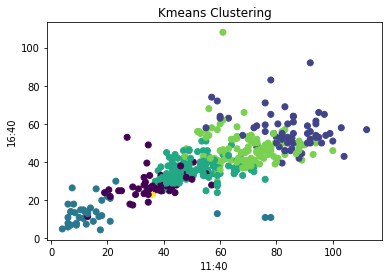

In [245]:
anss=ans
matrix9 = ans.as_matrix()
km9 = KMeans(n_clusters = 6)
y_pre9 = km9.fit_predict(matrix9)
km9.labels_
#plt.scatter(matrix[:,0],matrix[:,1], c=[plt.cm.spectral(float(i) /4) for i in km.labels_])
plt.scatter(matrix9[:, 70], matrix9[:, 100], c = y_pre9)
plt.title('Kmeans Clustering')
plt.xlabel('11:40')
plt.ylabel('16:40')
plt.show()


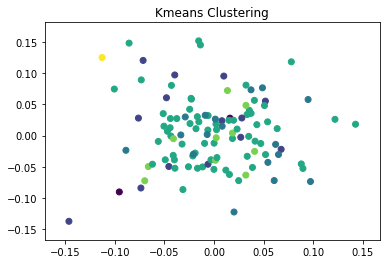

In [273]:
from sklearn.decomposition import PCA
pca =PCA(n_components='mle')
pca.fit(anss)
matrix8 = pca.components_ 

km8 = KMeans(n_clusters = 6)
y_pre8 = km8.fit_predict(matrix8)
km8.labels_
#plt.scatter(matrix[:,0],matrix[:,1], c=[plt.cm.spectral(float(i) /4) for i in km.labels_])
plt.scatter(matrix8[:, 3], matrix8[:, 8], c = y_pre8)
plt.title('Kmeans Clustering')

plt.show()

/anaconda3/lib/python3.6/site-packages/matplotlib/collections.py:836: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


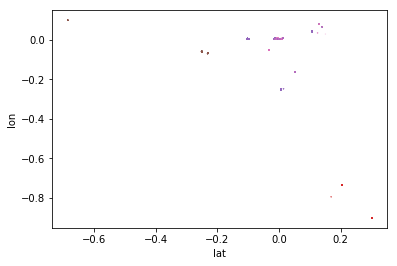

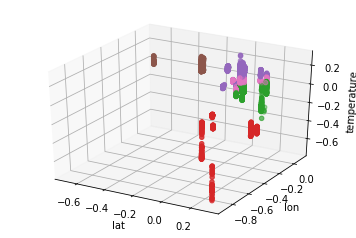

In [290]:
df5 = df[(df['Date']=='2017-03-10')]
mat5 = df5[[' lat',' lon','Temperature']]

mat5_norm = (mat5 - mat5.mean()) / (mat5.max() - mat5.min())
matrix5 = mat5_norm.as_matrix()
km5 = KMeans(n_clusters = 5)
km5.fit_predict(matrix5)

y_pre5 = set_colors(km5.labels_)
#plt.scatter(matrix[:,0],matrix[:,1], c=[plt.cm.spectral(float(i) /4) for i in km.labels_])
plt.scatter(matrix5[:,0], matrix5[:,1],matrix5[:,2], c = y_pre5)
plt.xlabel('lat')
plt.ylabel('lon')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('lat')
ax.set_ylabel('lon')
ax.set_zlabel('temperature')
ax.scatter(matrix5[:,0], matrix5[:,1],matrix5[:,2], c = y_pre5)
plt.show()
